# LDA : Linear Discriminant Analysis


## LDA Overview:

* LDA seeks to reduce the dimensionality of the data while maximizing class separability.

* LDA projects the data onto **new axes** called linear discriminants, which are the directions in which the classes are most separable.

- It focuses on maximizing the separability among known categories
- creat an axis that maximize the distance between means and minimize the scatter 

**Linear Discriminant**  is <u>linear combination of the original features 

In [1]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_wine, load_digits
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

## Import data from sklearn dataset

In [2]:
data_win = load_wine()
data_win
# separate features and target value from each other
Ind = data_win.data
tar = data_win.target


## Fit the LDA Model on dataset
- **LDA.explained_variance_ratio_**   :   

    * Tells you how much of the total variance in the dataset is explained by each of the selected linear discriminants.
    * First Linear Discriminant has the highest variance (class separability)  
    * Number of LDA components is determined by the number of classes

In [4]:
# Initialize the model
LDA = LinearDiscriminantAnalysis()

# fit and transform the model
LDA_transformed = LDA.fit_transform(Ind, tar)

# Linear Discriminants
LDA.explained_variance_ratio_


array([0.68747889, 0.31252111])

## Visual Observation

*  LDA1 = LDA_transformed[:,0] ==>  captures the most class-separating variance in the data.
*  LDA2 = LDA_transformed[:,1]  ==> captures the second most class-separating variance.

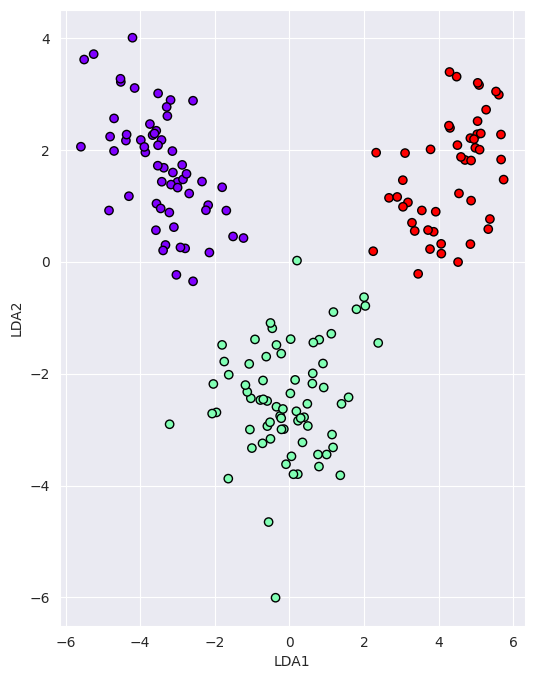

In [8]:
fig, ax = plt.subplots(figsize=(6,8))
scatter = ax.scatter(LDA_transformed[:,0],LDA_transformed[:,1], c = tar, cmap = 'rainbow', edgecolors = 'k')
ax.set_xlabel('LDA1')
ax.set_ylabel('LDA2')
plt.show()

## Import load_digits from sklearn dataset

**type(data_digit) :  sklearn.utils._bunch.Bunch**    ==>

In scikit-learn, a Bunch is a special object that behaves like a dictionary but also allows you to access its elements as if they were attributes of an object

In [33]:
# Import load_digits
data_digit = load_digits()
type(data_digit)
# separate data and target
digit_features = data_digit.data
digit_target = data_digit.target

# show distinct class and count the number of datapoints in each class through digit_target that represent target value
unique, counts = np.unique(digit_target, return_counts=True)
print(f'Classes in digit_target= {unique}', f' \nNumber of datapoints in each class= {counts}')

digit_features[0:10]

 Classes in digit_target= [0 1 2 3 4 5 6 7 8 9]  
Number of datapoints in each class= [178 182 177 183 181 182 181 179 174 180]


In [68]:
# Initialize the model
digit_LDA = LinearDiscriminantAnalysis()

# Fit the model
digit_LDA_transformed = digit_LDA.fit_transform(digit_features, digit_target)


yhat=digit_LDA_transformed.predict(digit_features)
accuracy_score = accuracy_score(digit_target, yhat)
print(f'accuracy_score= {accuracy_score}')

# Linear Discriminant
digit_LDA.explained_variance_ratio_

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

## Visual Observation



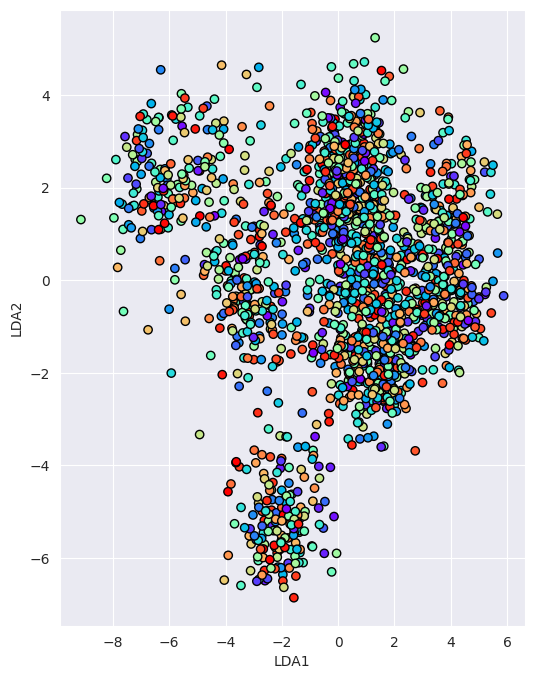

In [31]:
# creat color map
color = np.random.rand(1797)

# create subplot
fig, ax2 = plt.subplots(figsize = (6,8))

# plot
ax2.scatter(digit_LDA_transformed[:,0], digit_LDA_transformed[:,1], c=color, cmap = 'rainbow', edgecolors = 'k')
ax2.set_xlabel('LDA1')
ax2.set_ylabel('LDA2')
plt.show()

## first Result of fitting LDA model on Load_digits() dataset:
- model does not fit well on load_digits dataset.
- LDA1 is low, near 28%
- scatter plot observation shows the model couldnt separate different classes in load_digits



## Next Steps for model Improvements 

1. Normalize the data and check the variance reatio
- tune up LDA and make some changes on different value of parameters

In [42]:
# find the shape of dataset
print(f'Digit Features shape = \n{digit_features.shape}')
print(f'Digit target shape = \n {digit_target.shape}')

# Initialize Standard Scaler
scaler = StandardScaler()

# Normalize the dataset
scaled_digit = scaler.fit_transform(digit_features)


Digit Features shape = 
(1797, 64)
Digit target shape = 
 (1797,)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

### 1. Normalize the data and check the variance reatio

- Use Standard Scaler to normalize the data



  ### Result:
  **Not Improved**

In [52]:
digit_LDA2 = LinearDiscriminantAnalysis()
# Fit and Transform model on features and target values
scaled_digit_transformed = digit_LDA2.fit_transform(scaled_digit, digit_target)
digit_LDA2.explained_variance_ratio_


array([0.28912041, 0.18262788, 0.16962345, 0.1167055 , 0.08301253,
       0.06565685, 0.04310127, 0.0293257 , 0.0208264 ])

### 2. Tune up LDA and use PCA for feature selection to improve the fitting process



#### **LinearDiscriminantAnalysis tune up:**
- n_component : 9   ==>   the maximum value of LDA components = (n_classes -1) -  Default value was 9 too 
- solver : 'svd'   ==> definition : It is an algorithm that the model uses to compute the **optimal** linear discriminants.
    * works well with high-dimensional data


#### PCA for feature Selection
- Use PCA as features selection method to reduce the dimensionality of data before applying LDA
- This is particularly useful if your data has a large number of features, some of which may be irrelevant or redundant.

#### Cross validation
- Use cross_val_score, to evaluate the performance of LDA with different hyperparameters

#### Pipeline Correct Order
1. **Standardization** (StandardScaler())
2. **Dimensionality Reduction** (PCA)
3. **Classification**  (LinearDiscriminantAnalysis())

In [62]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), ('PCA', PCA(n_components=9)), ('model', LinearDiscriminantAnalysis(solver='svd')),])

score = cross_val_score(pipeline, digit_features, digit_target, cv=5)
print(f'Cross-Validation Accuracy= {score.mean()}')

Cross-Validation Accuracy= 0.81248220365212
